In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import esutil, scipy
sys.path.append('../')
from utils import *
from cmass_modules import io, Cuts
%matplotlib inline
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
from plot_chain import plot_single, plot_triple #, calling_public_planck_chains

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def clean_gold(gold_st82):
    from run_DMASS import priorCut_test
    gold_st82 = gold_st82[gold_st82['MODEST_CLASS'] == 1]
    gold_st82 = Cuts.keepGoodRegion(gold_st82)
    mask_y1a1 = (gold_st82['FLAGS_GOLD'] == 0 )&(priorCut_test(gold_st82))
    gold_st82 = gold_st82[mask_y1a1]
    return gold_st82

# Train Sample Z distribution

In [6]:
gold_st82 = io.SearchAndCallFits(path = '/n/des/lee.5922/data/gold_cat/', keyword='STRIPE')
gold_st82 = clean_gold(gold_st82)


--------------------------------
 calling catalog
--------------------------------
Y1A1_GOLD_STRIPE82_v2_000001.fits
Y1A1_GOLD_STRIPE82_v2_000002.fits
Y1A1_GOLD_STRIPE82_v2_000003.fits
Y1A1_GOLD_STRIPE82_v2_000004.fits
Y1A1_GOLD_STRIPE82_v2_000005.fits
Y1A1_GOLD_STRIPE82_v2_000006.fits
Y1A1_GOLD_STRIPE82_v2_000007.fits
Y1A1_GOLD_STRIPE82_v2_000008.fits
reading 1/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000001.fits
reading 2/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000002.fits
reading 3/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000003.fits
reading 4/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000004.fits
reading 5/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000005.fits
reading 6/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000006.fits
reading 7/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000007.fits
reading 8/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000008.fits


/n/home00/lee.5922/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


CHECK input catalog has only galaxies


In [6]:
#gold_spt = io.SearchAndCallFits(path = '/n/des/lee.5922/data/gold_cat/', keyword='Y1A1_GOLD_00001')
#gold_spt = clean_gold(gold_spt)

In [7]:
#cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South.fits.gz')
cmass_photo = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
cmass_stripe = Cuts.keepGoodRegion(cmass_photo)
gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_stripe)

In [5]:
cmass_train.dtype.names

('OBJID',
 'PARENTID',
 'FIELDID',
 'SKYVERSION',
 'MODE',
 'CLEAN',
 'RUN',
 'RERUN',
 'CAMCOL',
 'FIELD',
 'ID',
 'PARENT',
 'NCHILD',
 'OBJC_TYPE',
 'OBJC_PROB_PSF',
 'OBJC_FLAGS',
 'OBJC_FLAGS2',
 'OBJC_ROWC',
 'OBJC_ROWCERR',
 'OBJC_COLC',
 'OBJC_COLCERR',
 'ROWVDEG',
 'ROWVDEGERR',
 'COLVDEG',
 'COLVDEGERR',
 'ROWC',
 'ROWCERR',
 'COLC',
 'COLCERR',
 'PETROTHETA',
 'PETROTHETAERR',
 'PETROTH50',
 'PETROTH50ERR',
 'PETROTH90',
 'PETROTH90ERR',
 'Q',
 'QERR',
 'U',
 'UERR',
 'M_E1',
 'M_E2',
 'M_E1E1ERR',
 'M_E1E2ERR',
 'M_E2E2ERR',
 'M_RR_CC',
 'M_RR_CCERR',
 'M_CR4',
 'M_E1_PSF',
 'M_E2_PSF',
 'M_RR_CC_PSF',
 'M_CR4_PSF',
 'THETA_DEV',
 'THETA_DEVERR',
 'AB_DEV',
 'AB_DEVERR',
 'THETA_EXP',
 'THETA_EXPERR',
 'AB_EXP',
 'AB_EXPERR',
 'FRACDEV',
 'FLAGS',
 'FLAGS2',
 'TYPE',
 'PROB_PSF',
 'NPROF',
 'PROFMEAN_NMGY',
 'PROFERR_NMGY',
 'STAR_LNL',
 'EXP_LNL',
 'DEV_LNL',
 'PSP_STATUS',
 'PIXSCALE',
 'RA',
 'DEC',
 'CX',
 'CY',
 'CZ',
 'RAERR',
 'DECERR',
 'L',
 'B',
 'OFFSETRA',
 'OFF

In [21]:
#cmass_photo = io.getSGCCMASSphotoObjcat()
#cmass_stripe = Cuts.keepGoodRegion(cmass_photo)
#gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_photo)


--------------------------------
 calling BOSS SGC CMASS catalog
--------------------------------
Applying Healpix BOSS SGC footprint mask
Change healpix mask to spatial cut later..... Don't forget!!! 


In [8]:
g_sdss = cmass_train['MODELMAG'][:,1]-cmass_train['EXTINCTION'][:,1]
r_sdss = cmass_train['MODELMAG'][:,2]-cmass_train['EXTINCTION'][:,2]
i_sdss = cmass_train['MODELMAG'][:,3]-cmass_train['EXTINCTION'][:,3]
gr_sdss = g_sdss - r_sdss
ri_sdss = r_sdss - i_sdss

gr_des = gold_train['MAG_DETMODEL_G']- gold_train['MAG_DETMODEL_R']
ri_des = gold_train['MAG_DETMODEL_R']- gold_train['MAG_DETMODEL_I']

In [9]:
x = np.linspace(-2,4,10)
dperp = 0.55 + x/8.

In [10]:
gr_sdss_err = np.sqrt(cmass_train['MODELMAGERR'][:,1]**2 + cmass_train['MODELMAGERR'][:,2]**2)
ri_sdss_err = np.sqrt(cmass_train['MODELMAGERR'][:,2]**2 + cmass_train['MODELMAGERR'][:,3]**2)

gr_des_err = np.sqrt(gold_train['MAGERR_DETMODEL_G']**2 +  gold_train['MAGERR_DETMODEL_R']**2 )
ri_des_err = np.sqrt(gold_train['MAGERR_DETMODEL_R']**2 +  gold_train['MAGERR_DETMODEL_I']**2 )

In [11]:
dperpcut = ((ri_sdss - gr_sdss/8. < 0.551) & 
((gr_sdss>0.5)&(gr_sdss<0.96)|
 ((gr_sdss>1.43)&(gr_sdss<1.435))|
 ((gr_sdss>1.85)&(gr_sdss<3.0)) ) )
dperpcut_des = (ri_des - gr_des/8. < 0.5505) & (ri_des - gr_des/8. > 0.55035)
print np.sum(dperpcut), np.sum(dperpcut_des)

6 7


(0.2, 1.8)

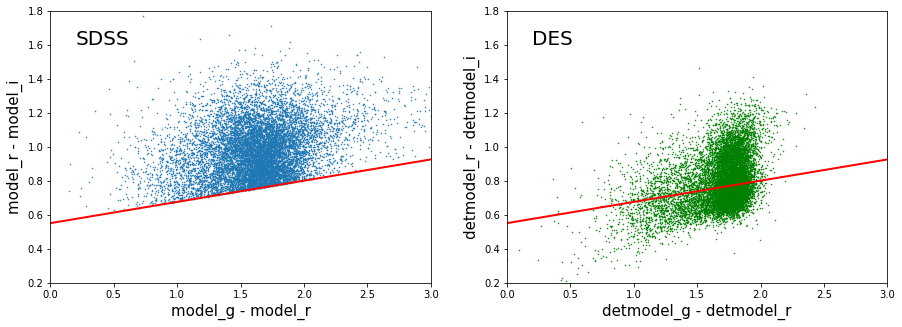

In [15]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(15,5))

ax.plot(gr_sdss, ri_sdss, '.', markersize = 1)
ax.plot(x, dperp, 'r-', linewidth=2)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)

ax.text(0.2, 1.6, 'SDSS', fontsize=20)
ax.set_xlabel('model_g - model_r', fontsize=15)
ax.set_ylabel('model_r - model_i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)


ax2.plot(gr_des, ri_des, 'g.', markersize = 1)
ax2.plot(x, dperp, 'r-', linewidth = 2)
#ax2.errorbar( gr_des[dperpcut], ri_des[dperpcut], xerr = gr_des_err[dperpcut], 
#            yerr = ri_des_err[dperpcut], fmt = '.', color='black', zorder=10)

ax2.text(0.2, 1.6, 'DES', fontsize=20)
ax2.set_xlabel('detmodel_g - detmodel_r', fontsize=15)
ax2.set_ylabel('detmodel_r - detmodel_i', fontsize=15)

ax2.set_xlim(0,3.)
ax2.set_ylim(0.2,1.8)

In [45]:
def mixing_SDSS_color(data, suffix = '', sdss = None, cmass = None ):
    
    #filter = ['G', 'R', 'I', 'Z']
    filter = [1,2,3,4]
    mag = ['CMODELMAG', 'MODELMAG']
    magtag = mag#[ m+'_'+f+suffix for m in mag for f in filter ]
    #del magtag[0], magtag[2]
    err = [ 'CMODELMAGERR','MODELMAGERR']
    errtag = err#[ e+'_'+f for e in err for f in filter ]
    #del errtag[0], errtag[2]
    
    
    print data['CMODELMAG'][:,0].size
    
    X = [ data[mt][:,i] for mt in magtag for i in filter ]
    del X[0], X[2]
    Xerr = [ data[mt][:,i] for mt in errtag for i in filter]
    del Xerr[0], Xerr[2]
    #reddeningtag = 'XCORR_SFD98'

    X = np.vstack(X).T
    Xerr = np.vstack(Xerr).T
    # mixing matrix
    W = np.array([
                  [1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],    # i cmag
                  [0, 0, 1, -1, 0, 0],   # g-r
                  [0, 0, 0, 1, -1, 0],   # r-i
                  [0, 0, 0, 0, 1, -1]])  # i-z

    X = np.dot(X, W.T)

    Xcov = np.zeros(Xerr.shape + Xerr.shape[-1:])
    Xcov[:, range(Xerr.shape[1]), range(Xerr.shape[1])] = Xerr**2
    Xcov = np.tensordot(np.dot(Xcov, W.T), W, (-2, -1))
    return X, Xcov

In [188]:
sdss_photo = esutil.io.read('/n/des/huff.791/Projects/CMASS/Data/s82_350_355_emhuff.fit', upper=True)

In [46]:
X_cmass_train, Xcov_cmass_train = mixing_SDSS_color(cmass_train)

11377


In [51]:
X_cmass_train_new = [np.random.multivariate_normal( X_cmass_train[i], Xcov_cmass_train[i], 1 ) for i in range(cmass_train.size) ]



In [56]:
X_cmass_train_new = np.array(X_cmass_train_new)

In [66]:
new_gr_sdss = X_cmass_train_new[:,0][:,2]
new_ri_sdss = X_cmass_train_new[:,0][:,3]

In [192]:
xbins = np.linspace(0, 3.0, 150)
ybins = np.linspace(0.2, 1.8, 120)
Ngal_sdss, xedges, yedges = np.histogram2d(gr_sdss, ri_sdss, bins=(xbins, ybins))
Ngal_des, xedges, yedges = np.histogram2d(gr_des, ri_des, bins=(xbins, ybins))

Ngal_sdss[Ngal_sdss == 0] = np.nan
Ngal_des[Ngal_des == 0] = np.nan

(0.2, 1.8)

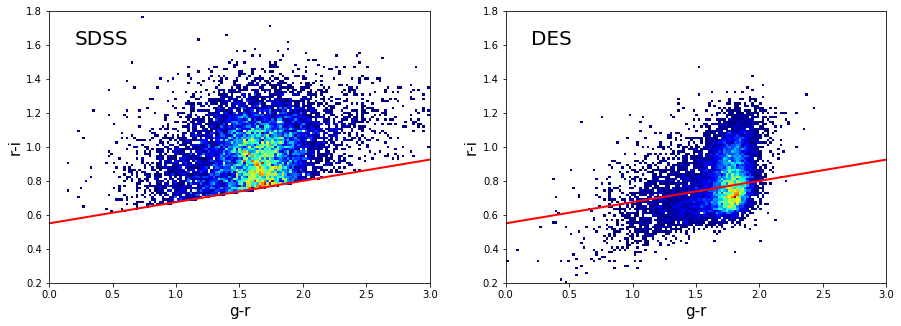

In [201]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(15,5))

#ax.plot(gr_sdss, ri_sdss, '.', markersize = 1)

ax.imshow(np.rot90(Ngal_sdss), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=cm.jet, aspect='auto')#, 

ax.plot(x, dperp, 'r-', linewidth=2)

#ax.errorbar( gr_sdss[dperpcut], ri_sdss[dperpcut], xerr = gr_sdss_err[dperpcut], 
#            yerr = ri_sdss_err[dperpcut], fmt = 'o', color='black', zorder=10)

ax.text(0.2, 1.6, 'SDSS', fontsize=20)
ax.set_xlabel('g-r', fontsize=15)
ax.set_ylabel('r-i', fontsize=15)
ax.set_xlim(0,3.)
ax.set_ylim(0.2,1.8)


#ax2.plot(gr_des, ri_des, 'g.', markersize = 1)
#ax2.plot(new_gr_sdss, new_ri_sdss, 'g.', markersize = 1)
ax2.imshow(np.rot90(Ngal_des), extent=(np.amin(xbins), np.amax(xbins), np.amin(ybins), np.amax(ybins)),
        cmap=cm.jet, aspect='auto'  )#, 

ax2.plot(x, dperp, 'r-', linewidth = 2)
#ax2.errorbar( gr_des[dperpcut], ri_des[dperpcut], xerr = gr_des_err[dperpcut], 
#            yerr = ri_des_err[dperpcut], fmt = '.', color='black', zorder=10)

ax2.text(0.2, 1.6, 'DES', fontsize=20)
ax2.set_xlabel('g-r', fontsize=15)
ax2.set_ylabel('r-i', fontsize=15)

ax2.set_xlim(0,3.)
ax2.set_ylim(0.2,1.8)

In [390]:


base_dir ='/n/des/lee.5922/programs/cosmolike/MG_musigma/'

ggl_boss1 = np.genfromtxt(base_dir+'like/like_test_ggl_boss_boss_fid1_sam320000')[3200:,:-1]
ggl_boss2 = np.genfromtxt(base_dir+'like/like_test_ggl_boss_boss_fid2_sam320000')[3200:,:-1]
ggl_boss = np.vstack((ggl_boss1, ggl_boss2))

planck_ggl_boss1 = np.genfromtxt(base_dir+'like/like_test_planck6params_boss_fid1_sam320000')[12800*10:,:-1]
planck_ggl_boss2 = np.genfromtxt(base_dir+'like/like_test_planck6params_boss_fid2_sam320000')[12800*10:,:-1]
planck_ggl_boss = np.vstack((planck_ggl_boss1, planck_ggl_boss2))

planck_shear_ggl_boss1 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_sam320000')[12800*10:,:-1]
planck_shear_ggl_boss2 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss2_sam320000')[20000*10:,:-1]
planck_shear_ggl_boss = np.vstack((planck_shear_ggl_boss1, planck_shear_ggl_boss2))

Simpson_data = np.random.multivariate_normal([0.0, 0.0], [[0.14**2, 0], [0, 0.25**2]], size=320000)

#boss_6df = np.genfromtxt('like/like_boss_6df_sam320000')[12800*4:,5:7]
#boss_6df_lowz = np.genfromtxt('like/like_boss_lowz_6df_sam320000_copy')[:,5:7]
#boss_lowz = np.genfromtxt('like/like_boss_lowz_sam320000_copy')[:,5:7]

#planck_boss_6df = np.genfromtxt('like/like_planck_boss_6df_sam320000')[12800*4:,5:7]
#planck_boss_lowz = np.genfromtxt('like/like_planck_boss_lowz_sam320000')[12800*4:,5:7]
#planck_boss_Howlett = np.genfromtxt('like/like_planck_boss_Howlett_sam320000')[12800*4:,5:7]

planck_shear_ggl_boss_6df = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_6df2_sam320000')[12800*10:,:-1]  
#planck_ggl_shear = np.genfromtxt('like/like_planck_ggl_shear_sam320000')[12800*10:,:-1]

#planck_all_clustering = np.genfromtxt('like/like_planck_boss_lowz_6df_wiggleZ_howlett_alam_sam320000_copy')[:12800*10,:-1]

#planck_all_clustering_wo_boss = np.genfromtxt('like/like_planck_lowz_6df_wiggleZ_howlett_alam_sam320000')[:12800*25,:-1]
planck_shear_ggl_boss_6df_h0 = np.genfromtxt(base_dir+'like/like_planck_shear_ggl_boss_6df_h0_sam320000')[12800*10:,:-1]

#planck_simpson_BAO = np.genfromtxt('like/like_simpson2_sam320000')[12800*10:,:-1]
#test_plc = np.genfromtxt('like/like_test_plc_sam320000_copy')[12800:,:-1]



In [391]:
ggl_boss.shape

(633600, 10)

plot save to  test.png


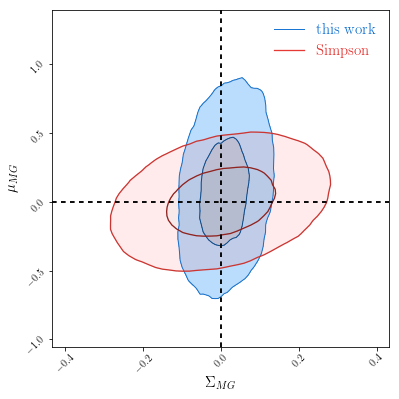

In [401]:
#### plotting settings #########################################################################
Simpson_data = np.random.multivariate_normal([0, 0], [[0.14**2, 0.01], [0.01, 0.25**2]], size=320000)

musigma_name = ['$\Sigma_{MG}$', '$\mu_{MG}$']

## planck_ggl_boss vs planck_ggl_boss_6df vs Simpson
figname = 'test.png'
#plot_triple([planck_ggl_boss, planck_shear_ggl_boss, planck_shear_ggl_boss_6df, Simpson_data], [musigma_name, musigma_name, musigma_name, musigma_name],  [0.0, 0.0], figname, chain_names = ['ggl+boss+planck', 'ggl+boss+planck+shear','ggl+boss+planck+shear+6df', 'Simpson et al.'], plot_hists=False )

plot_triple([planck_shear_ggl_boss_6df[:,5:7], Simpson_data],
            [musigma_name, musigma_name, musigma_name],  
            [0.0, 0.0], figname, 
            shade = [True, True], 
            chain_names = ['this work', 'Simpson'], plot_hists=False )

In [416]:
cmass_spec = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR12v5_CMASS_South.fits.gz')
#cmass_photo = esutil.io.read('/n/des/lee.5922/data/cmass_cat/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
cmass_stripe = Cuts.keepGoodRegion(cmass_spec)
gold_train, cmass_train = matchCatalogsbyPosition(gold_st82, cmass_stripe)

In [202]:
#dmass_st82 = esutil.io.read('../output/n2/dmass_st82.fits')
dmass_st82 = esutil.io.read('../output/n2//dmass_st82.fits')
dmass_spt = esutil.io.read('../output/n2_2/dmass_spt.fits')
lowccut = dmass_spt['EachProb_CMASS'] > 0.0
dmass_spt = dmass_spt[lowccut]

fraction of dmass sample at z < 0.43 : 3.9104057045918514 11593
fraction of cmass sample at z < 0.43 : 3.9909449148989697 11927
fraction of sample at z < 0.43 : 7.057361637514309 112398


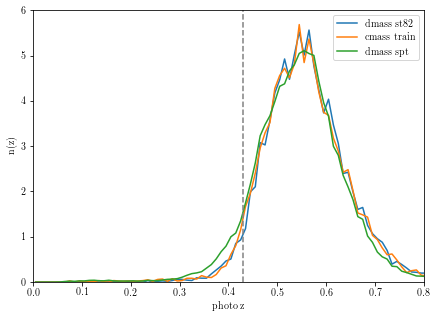

In [530]:
zbin, dz = np.linspace(0.0, 10.0, 1001, retstep=True)
zcenter = zbin[:-1]+dz/2.
fig, ax = plt.subplots(figsize = (7,5))
N_dmass_st82,_= np.histogram( dmass_st82['DESDM_ZP'], bins=zbin, normed=True)
N_cmass_st82,_  = np.histogram( gold_train['DESDM_ZP'], bins=zbin,  normed=True)
N_dmass_spt,_  = np.histogram( dmass_spt['DESDM_ZP'], bins=zbin,  normed=True)
N_cmass_st82_specz,_  = np.histogram( cmass_train['Z'], bins=zbin,  normed=True)
#N_dmass_spt2,_  = np.histogram( dmass_spt_v2['DESDM_ZP'], bins=zbin,  normed=True)
#N_dmass_st,_  = np.histogram( dmass_st['DESDM_ZP'], bins=zbin,  normed=True)

ax.plot(zcenter, N_dmass_st82, label = 'dmass st82')
ax.plot(zcenter, N_cmass_st82, label = 'cmass train')
ax.plot(zcenter, N_dmass_spt, label = 'dmass spt')
#ax.plot(zcenter, N_cmass_st82_specz, '--' ,label = 'cmass train specz')
#ax.plot(zcenter, N_dmass_spt2, label = 'dmass spt, low prob cut')
ax.axvline(x = 0.43, color='grey', linestyle='--')


fraction1= scipy.integrate.simps(N_dmass_st82[:43], dx = dz )*100
fraction2= scipy.integrate.simps(N_cmass_st82[:43], dx = dz )*100
fraction3= scipy.integrate.simps(N_dmass_spt[:43], dx = dz )*100
#fraction4= scipy.integrate.simps(N_dmass_spt2[:43], dx = dz )*100

print 'fraction of dmass sample at z < 0.43 :', fraction1, dmass_st82.size
print 'fraction of cmass sample at z < 0.43 :', fraction2, gold_train.size
print 'fraction of sample at z < 0.43 :', fraction3, dmass_spt.size
#print 'fraction of sample at z < 0.43 :', fraction4, dmass_spt_v2.size

fraction = ' photo-z z < 0.43 \n DMASS : {:0.2f}% ({}) \n CMASS : {:0.2f}% ({})'\
.format(fraction1, dmass_st82.size, fraction2, gold_train.size)
#ax.text(0.02, 4, fraction, fontsize = 15 )
ax.set_xlabel('photo z')
ax.set_ylabel('n(z)')
ax.set_xlim(0, 0.8)
ax.set_ylim(0,6)
ax.legend()

In [ ]:
ls ../output/n5/

In [203]:
from xd import XD_fitting
clf_cmass = XD_fitting( None, pickleFileName = '../output/n2/gold_st82_XD_cmass.pkl')               
clf_no = XD_fitting( None, pickleFileName = '../output/n2/gold_st82_XD_no.pkl')
cmass_frac = np.loadtxt('../output/n2/cmassfrac')
# assign membership prob ----------------------------------
print '\n--------------------------------\n Assign membership prob\n--------------------------------'
print 'cmass_fraction', cmass_frac
from xd import assignCMASSProb
gold_train_prob = assignCMASSProb( gold_train, clf_cmass, clf_no, cmass_fraction = cmass_frac )
#gold_spt = assignCMASSProb( gold_spt, clf_cmass, clf_no, cmass_fraction = cmass_frac )


--------------------------------
 Assign membership prob
--------------------------------
cmass_fraction 0.0165126167
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 


In [515]:
prob_cat = esutil.io.read('../output/n3/gold_st82_prob.fits')
prob_cat_spt = io.SearchAndCallFits(path = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/',\
                                    keyword='gold_spt_prob')
from xd import resampleWithPth
#dmass_spt_v2, _ = resampleWithPth( prob_cat_spt, pstart = 0.01, pmax = 1.0 )
dmass_st82, _ = resampleWithPth( prob_cat, pstart = 0.01, pmax = 1.0 )


--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk001.fits
gold_spt_prob_jk002.fits
gold_spt_prob_jk003.fits
gold_spt_prob_jk004.fits
gold_spt_prob_jk005.fits
gold_spt_prob_jk006.fits
gold_spt_prob_jk007.fits
gold_spt_prob_jk008.fits
gold_spt_prob_jk009.fits
gold_spt_prob_jk010.fits
reading 1/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk001.fits
reading 2/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk002.fits
reading 3/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk003.fits
reading 4/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk004.fits
reading 5/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk005.fits
reading 6/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_spt_prob_jk006.fits
reading 7/10 /n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2/gold_

../xd.py:1454: RuntimeWarning: invalid value encountered in sqrt
  pcurve = (pmax-pmin) * np.sqrt( 1 - (pcenter - 1)**2 * 1./(1-p1stbin)**2 ) + pmin


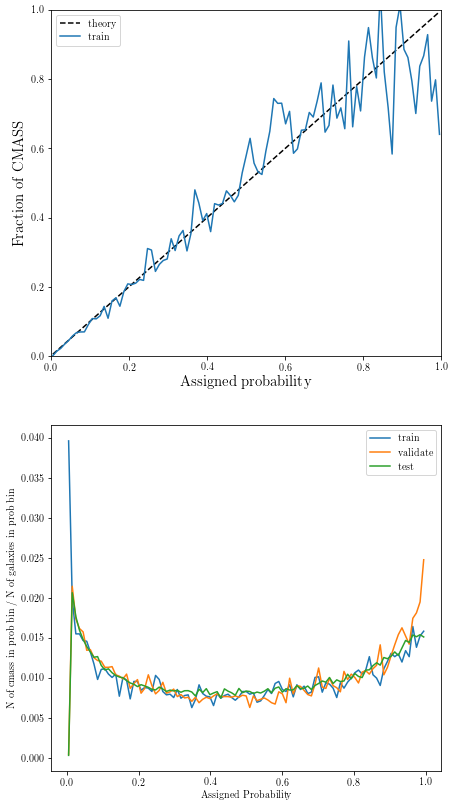

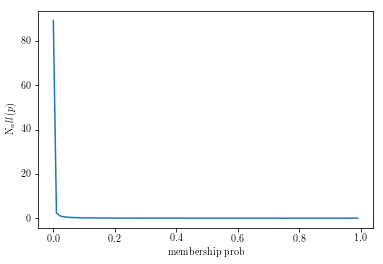

In [528]:
probbin,ps = np.linspace(0.0,1,100,retstep=True)
pcenter = probbin[:-1] + ps/2.
N_train, _ = np.histogram(gold_train_prob['EachProb_CMASS'], bins = probbin)
N, _ = np.histogram(dmass_st82['EachProb_CMASS'], bins = probbin)
N_all, _ = np.histogram(prob_cat['EachProb_CMASS'], bins = probbin)

N1, _ = np.histogram(dmass_spt['EachProb_CMASS'], bins = probbin)
N1_all, _ = np.histogram(prob_cat_spt['EachProb_CMASS'], bins = probbin)


fig, (ax,ax2) = plt.subplots(2,1,figsize = (7,14))

ax.plot(pcenter, pcenter, 'k--', label='theory')
ax.plot(pcenter, N_train*1./N_all, label='train')
#ax.plot(pcenter, N*1./N_all, label='validate')
#ax.plot(pcenter, N1*1./N1_all, label='spt')
ax.legend(loc='best')
ax.set_xlabel('Assigned probability', fontsize = 15)
ax.set_ylabel('Fraction of CMASS', fontsize = 15)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax2.plot(pcenter, N_train*1./np.sum(N_train), label='train')
ax2.plot(pcenter, N*1./np.sum(N), label='validate')
ax2.plot(pcenter, N1*1./np.sum(N1), label='test')

ax2.set_xlabel('Assigned Probability')
ax2.set_ylabel('N of cmass in prob bin / N of galaxies in prob bin')
ax2.legend()

fig, ax = plt.subplots()
p_all, _ = np.histogram(prob_cat['EachProb_CMASS'], bins = probbin, normed=True)
#p_all1, _ = np.histogram(gold_spt['EachProb_CMASS'], bins = probbin, normed=True)
ax.plot(probbin[:-1], p_all, label='all')
#ax.plot(probbin[:-1], p_all1, label='all')
ax.set_xlabel('membership prob')
ax.set_ylabel('N_all(p)')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


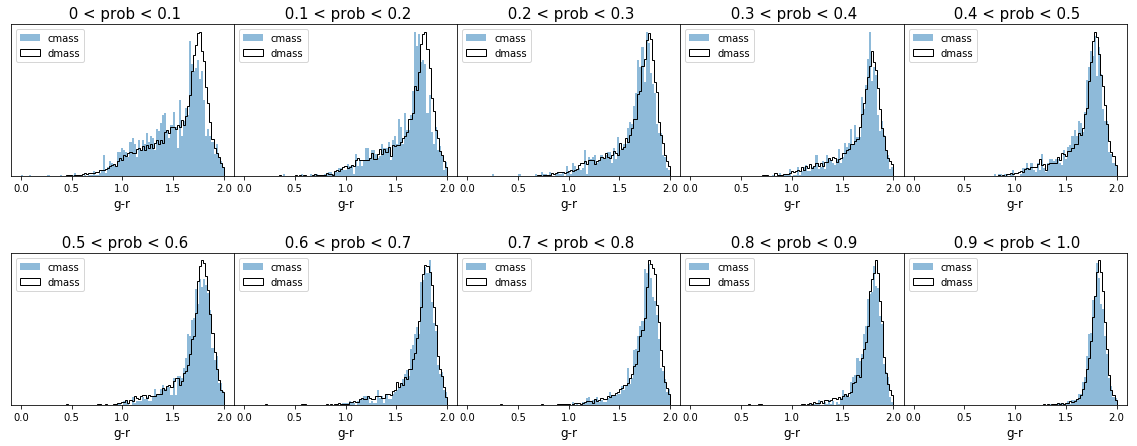

In [225]:

probcut = 0.0

labels = ['cmass', 'dmass']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'dmass' : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag, fontsize=15)
        ax[i].set_xlabel('g-r', fontsize = 12)
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


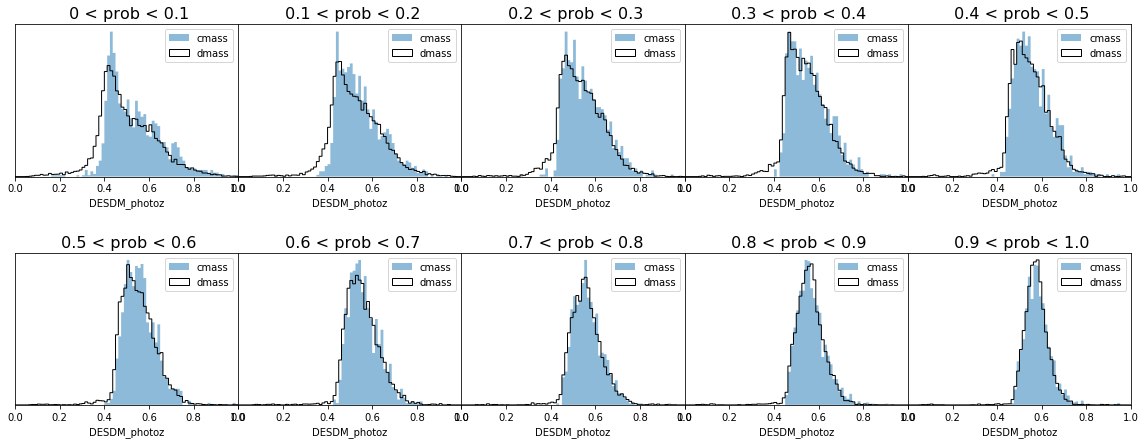

In [219]:
zbin, dz = np.linspace(0.0, 10.0, 801, retstep=True)
zcenter = zbin[:-1]+dz/2.

probcut = 0.0

labels = ['cmass', 'dmass']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'dmass' : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = 1.0, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = alpha, label = la + ''.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag, fontsize = 16)
        ax[i].set_xlabel('DESDM_photoz')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

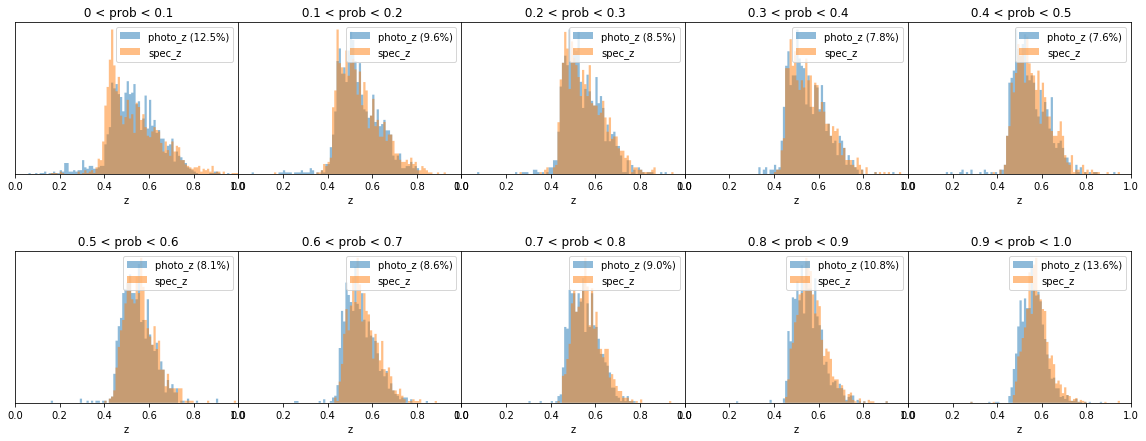

In [104]:

probcut = 0.0
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))

ax = ax.ravel()
for i in range(10):     
    #for la, cat in zip(labels, catlist) :     
    mask = (gold_train_prob['EachProb_CMASS'] > probcut) & (gold_train_prob['EachProb_CMASS'] < probcut + 0.1) \
    & (gold_train_prob['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
    
    ax[i].hist( cmass_train['Z'][mask], \
            bins = zbin, alpha = 0.5, label = 'photo_z ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
               normed=True, histtype='stepfilled' );  
    ax[i].hist( gold_train_prob['DESDM_ZP'][mask], \
            bins = zbin, alpha = 0.5, label = 'spec_z', \
            normed=True, histtype='stepfilled' );  

    tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
    ax[i].set_xlim(0, 1.0)
    ax[i].legend(loc='best')
    ax[i].set_title(tag)
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('n(z)')
    ax[i].get_yaxis().set_visible(False)
    #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


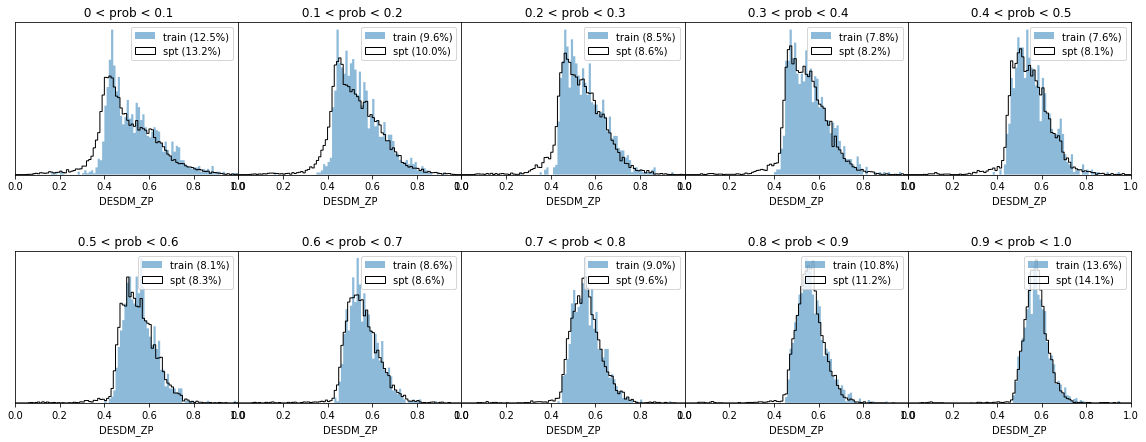

In [128]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['DESDM_ZP'][mask], \
                    bins = zbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


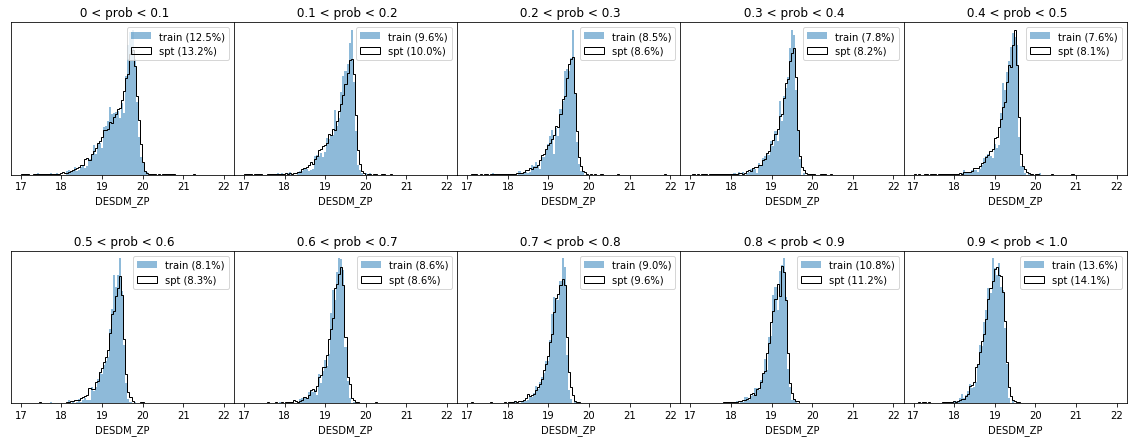

In [135]:

probcut = 0.0
cbin = np.linspace(17,22,100)
labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]

probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( cat['MAG_MODEL_Z'][mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc='best')
        ax[i].set_title(tag)
        ax[i].set_xlabel('DESDM_ZP')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


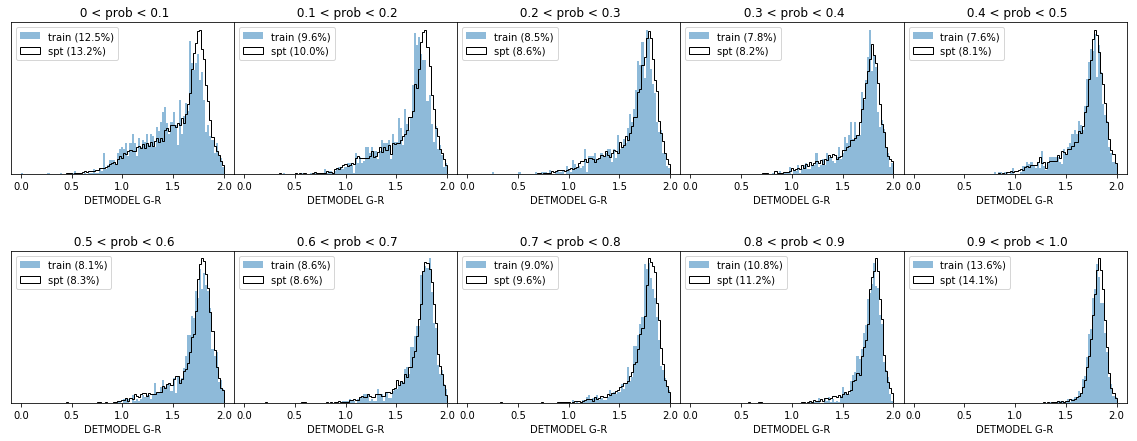

In [129]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_DETMODEL_G']-cat['MAG_DETMODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('DETMODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


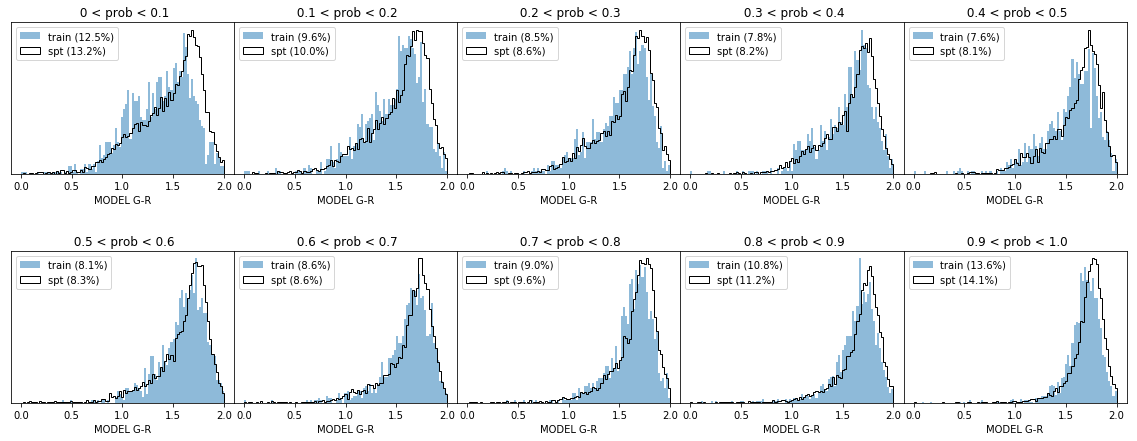

In [130]:

probcut = 0.0

labels = ['train', 'spt']
catlist = [gold_train_prob, dmass_spt]
cbin = np.linspace(0.,2., 100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01) # & ( (cat['MAG_MODEL_G']- cat['MAG_MODEL_R']) < 1.6)
        
        histtype = 'stepfilled' 
        alpha = 0.5
        if la == 'spt' : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='step', color = 'black');  
        
        else : 
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = alpha, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype=histtype);  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('MODEL G-R')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9


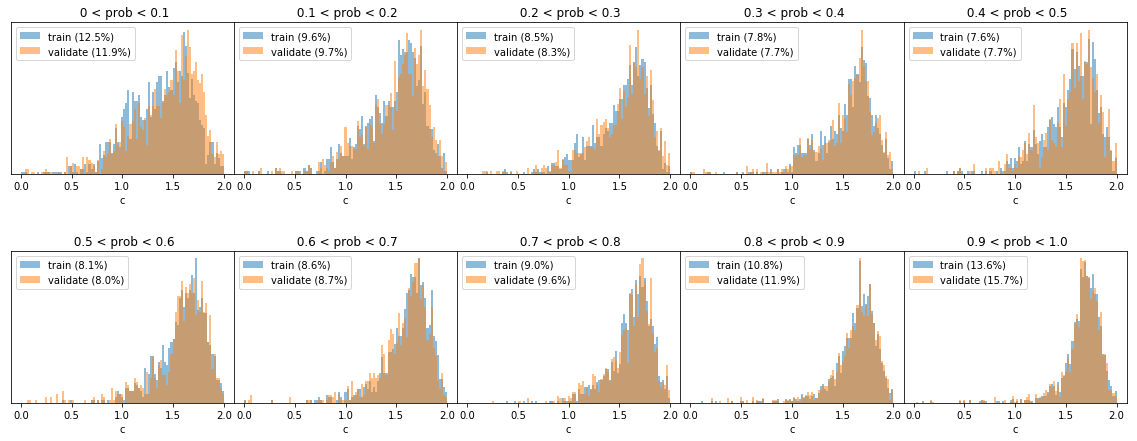

In [106]:

probcut = 0.0

labels = ['train', 'validate']
catlist = [gold_train_prob, dmass_st82]

cbin = np.linspace(0,2,100)
probcut = 0
fig, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.ravel()
for i in range(10):     
    for la, cat in zip(labels, catlist) :     
        mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
        & (cat['EachProb_CMASS'] > 0.01)
        ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                   normed=True, histtype='stepfilled' );  
        #print probcut, probcut+0.1, np.sum(mask), la
        print i,
        tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
        #ax[i].set_xlim(0, 1.0)
        ax[i].legend(loc=2)
        ax[i].set_title(tag)
        ax[i].set_xlabel('c')
        ax[i].set_ylabel('n(z)')
        ax[i].get_yaxis().set_visible(False)
        #elif i != 2 : ax[i].get_yaxis().set_visible(False)
        
    probcut += 0.1
    
#ax[0].get_yaxis().set_visible(True)
#ax[5].get_yaxis().set_visible(True)
fig.subplots_adjust(wspace=0, hspace=0.5);
#fig.savefig('../output/n2_2/pics/probhist.png')

In [14]:
#dmass_spt = np.hstack(dmlist)
#esutil.io.write('../output/n2_2/dmass_spt.fits', dmass_spt, clobber=True)


--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk001.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk002.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk003.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk004.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk005.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk006.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk007.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk008.fits

--------------------------------
 calling catalog
--------------------------------
gold_spt_prob_jk009.fits

------------------

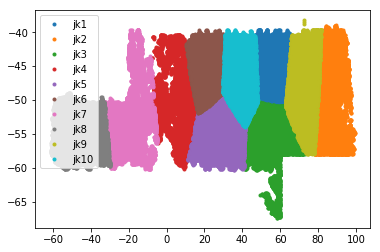

In [108]:
prob_cat_ilist = []
dmlist = []

from xd import resampleWithPth
fig, ax = plt.subplots()
for i in range(10):
    prob_cat_i = io.SearchAndCallFits(path = '/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/n2_2//',\
                                    keyword='gold_spt_prob_jk{:03}'.format(i+1))
    dm, _ = resampleWithPth( prob_cat_i, pstart = 0.01, pmax = 1.0 )
    prob_cat_ilist.append(prob_cat_i)
    dmlist.append(dm)
    
    ra = dm['RA']
    ra[ra > 180] = ra[ra > 180] - 360
    
    ax.plot(ra, dm['DEC'], '.', label = 'jk{}'.format(i+1))
ax.legend()
#fig.savefig('../output/n2_2/pics/jkregion.png')

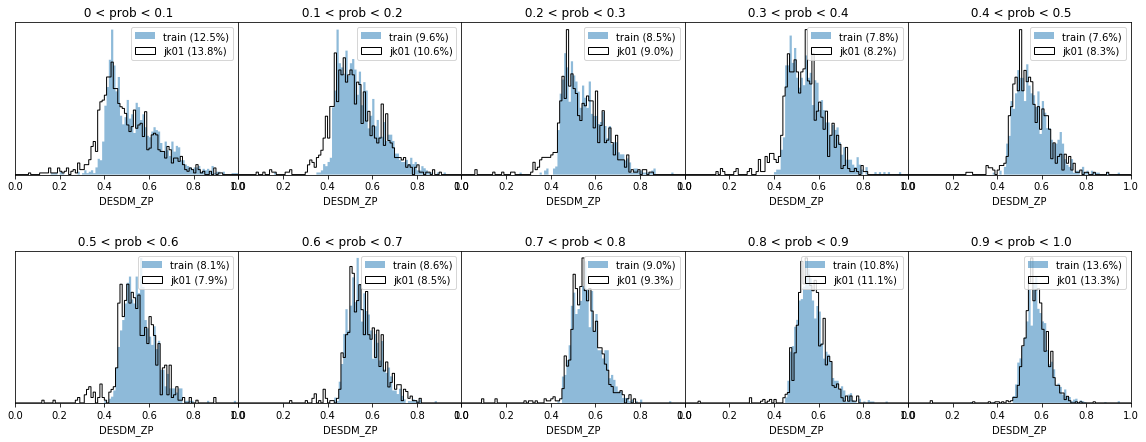

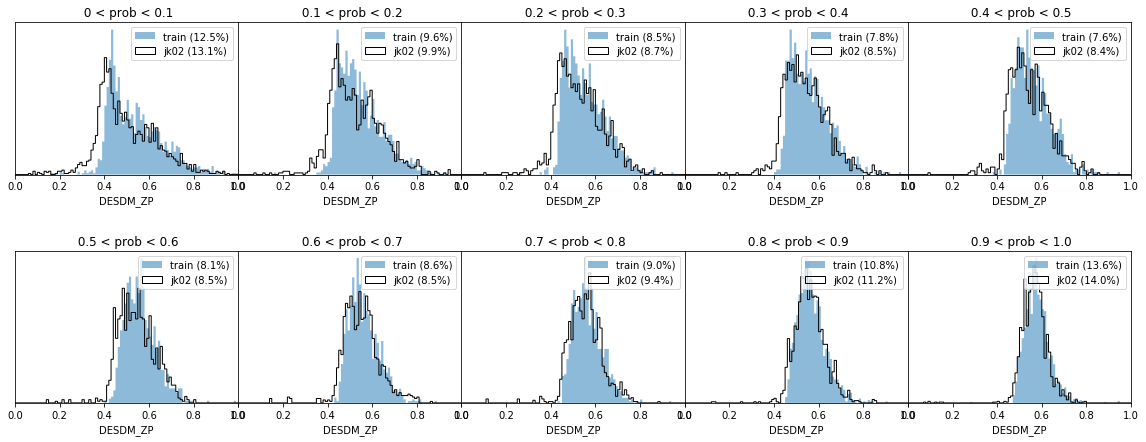

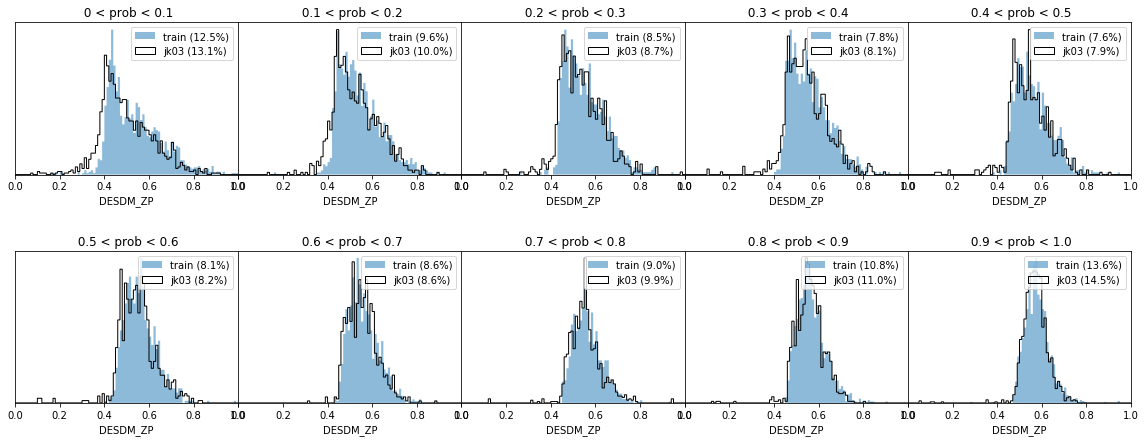

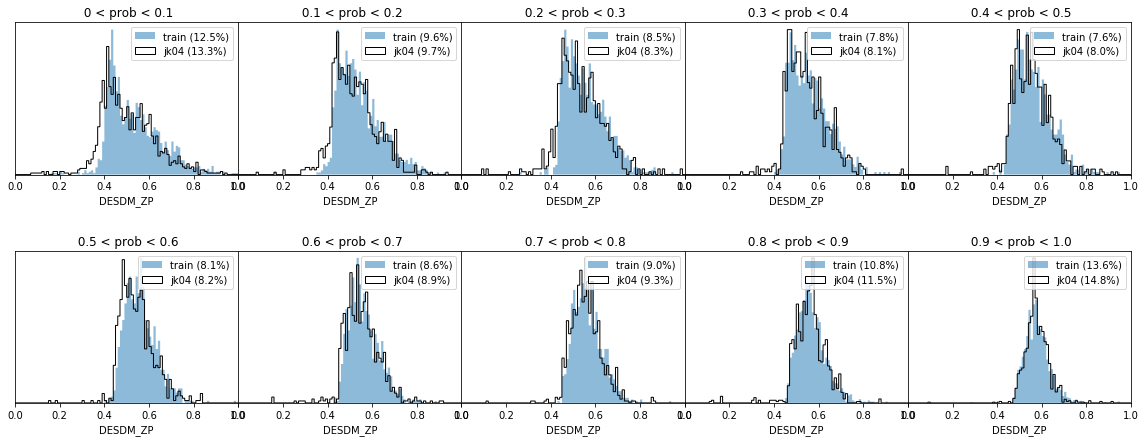

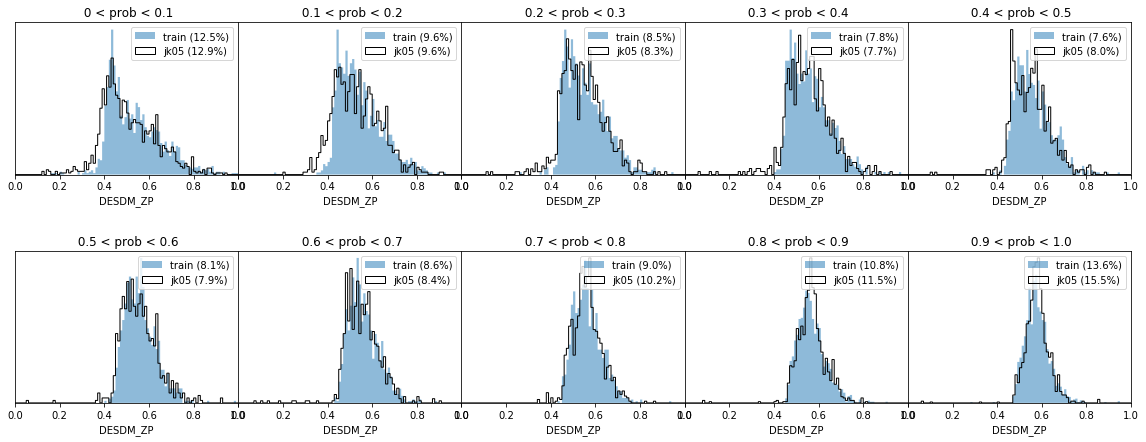

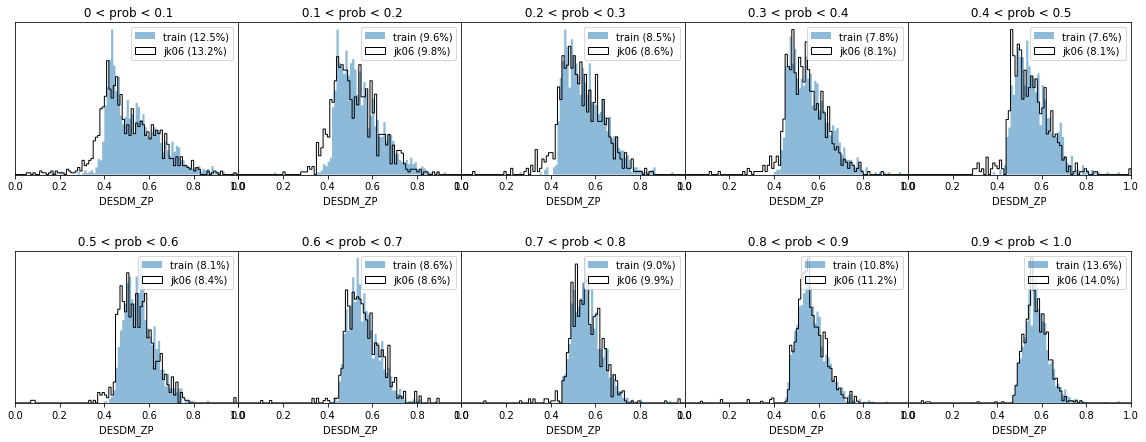

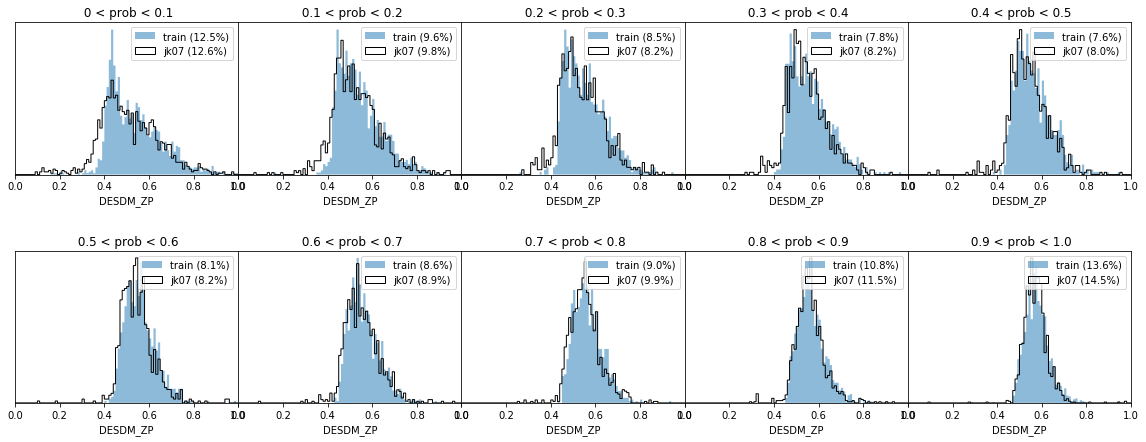

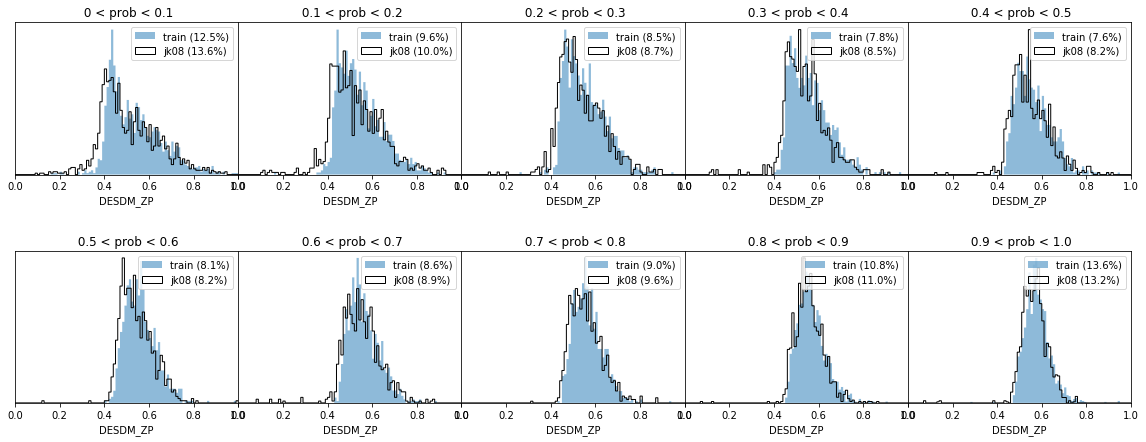

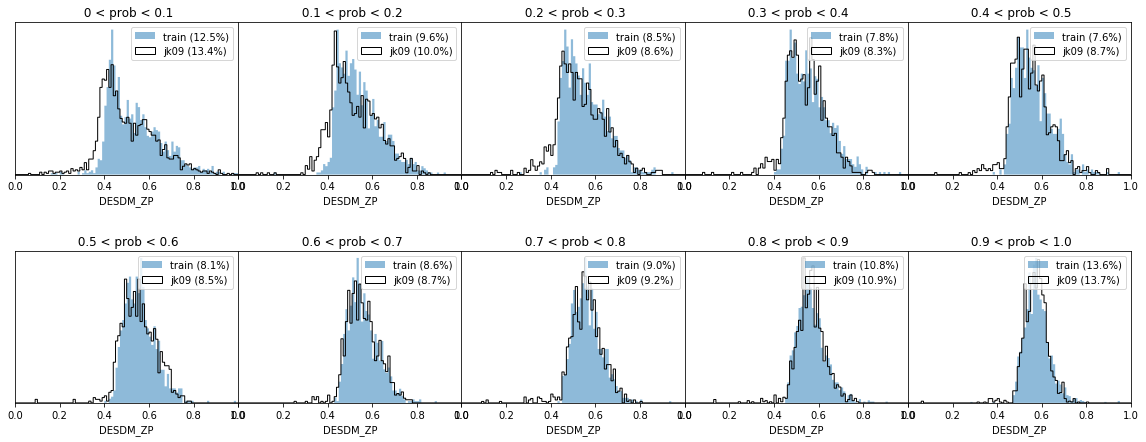

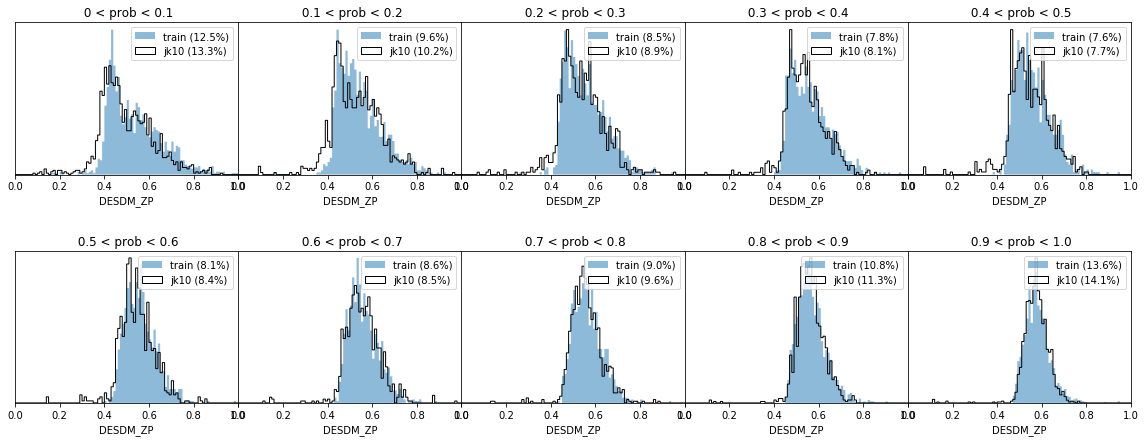

In [127]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]


for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01) #& ((cat['MAG_MODEL_G']-cat['MAG_MODEL_R']) < 1.6)
            if la == 'train':
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='stepfilled' );  
            else : 
                ax[i].hist( cat['DESDM_ZP'][mask], \
                        bins = zbin, alpha = 1.0, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                           normed=True, histtype='step', color='black' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('DESDM_ZP')
            ax[i].set_ylabel('n(z)')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    #fig.savefig('../output/n2_2/pics/probhist_jk{:03}.png'.format(j+1))

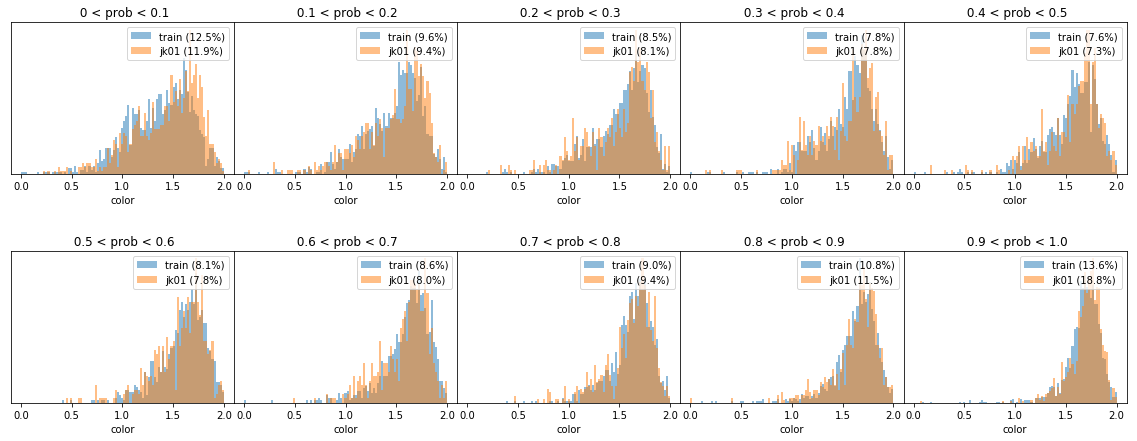

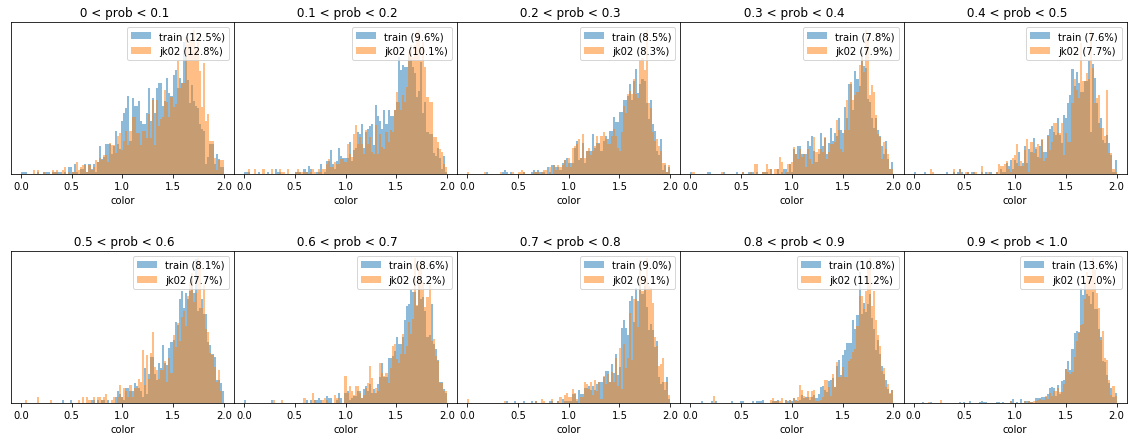

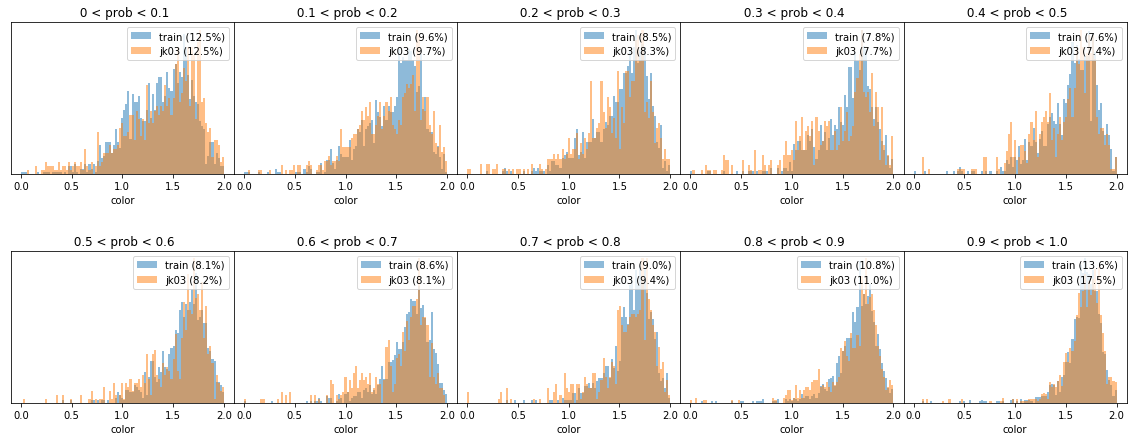

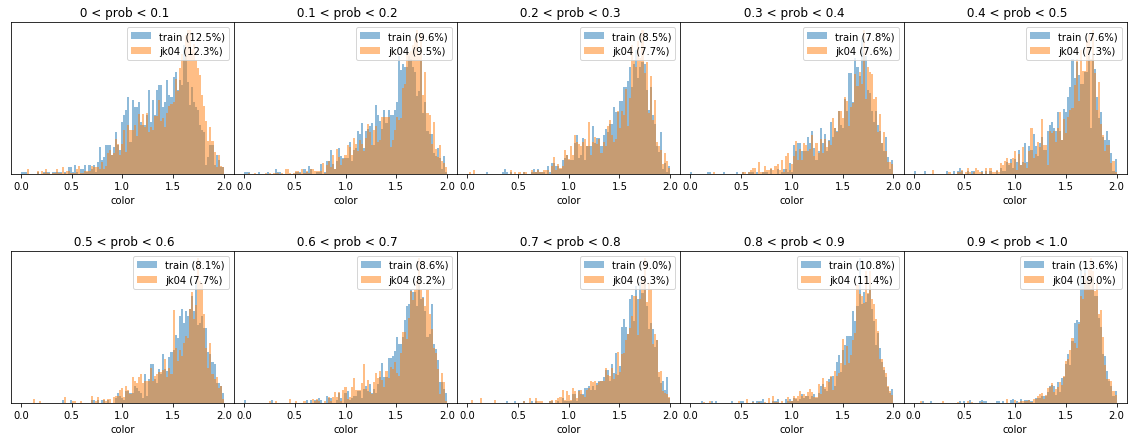

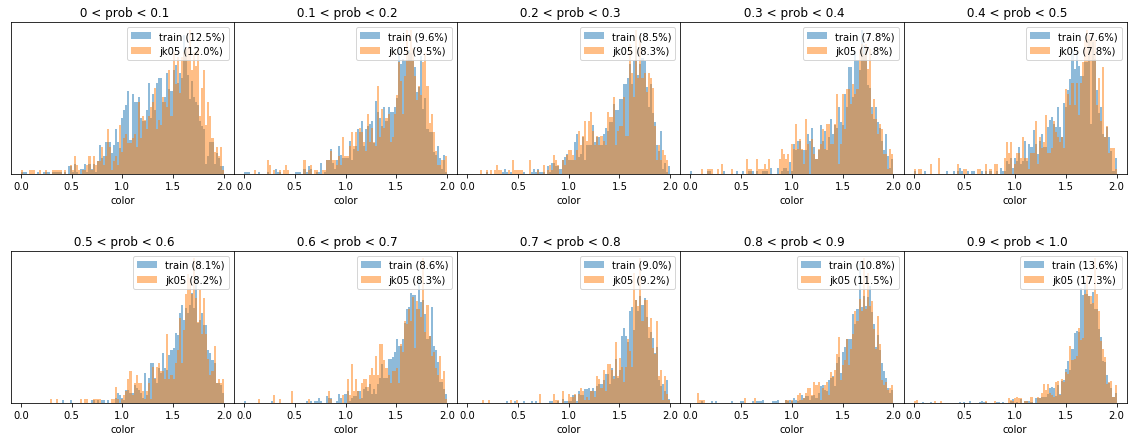

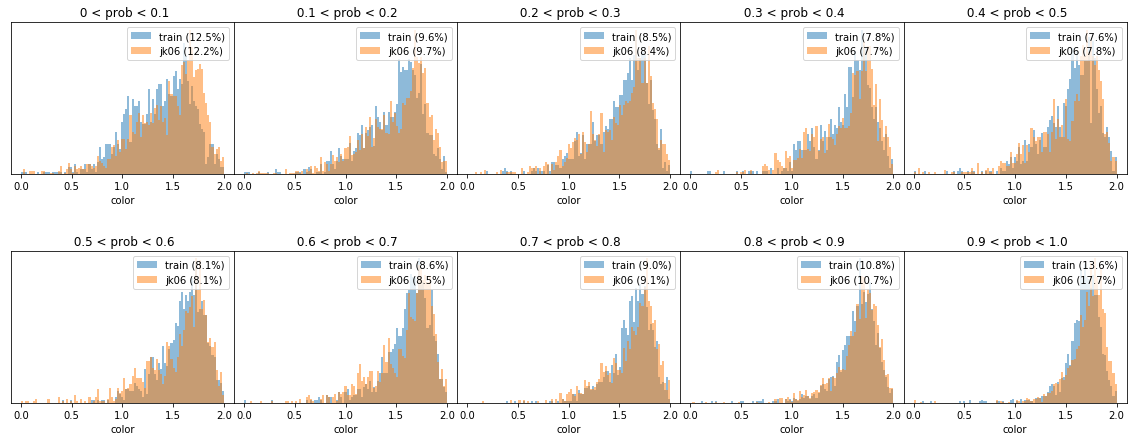

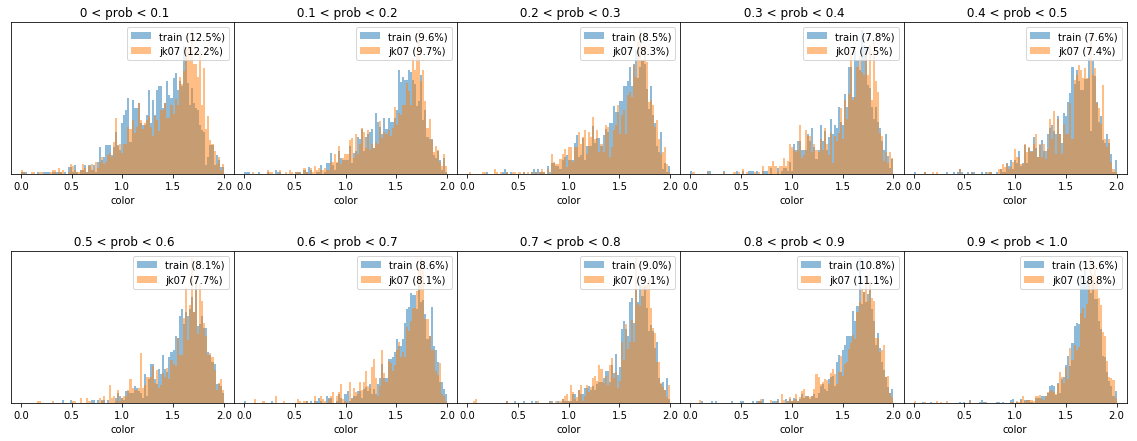

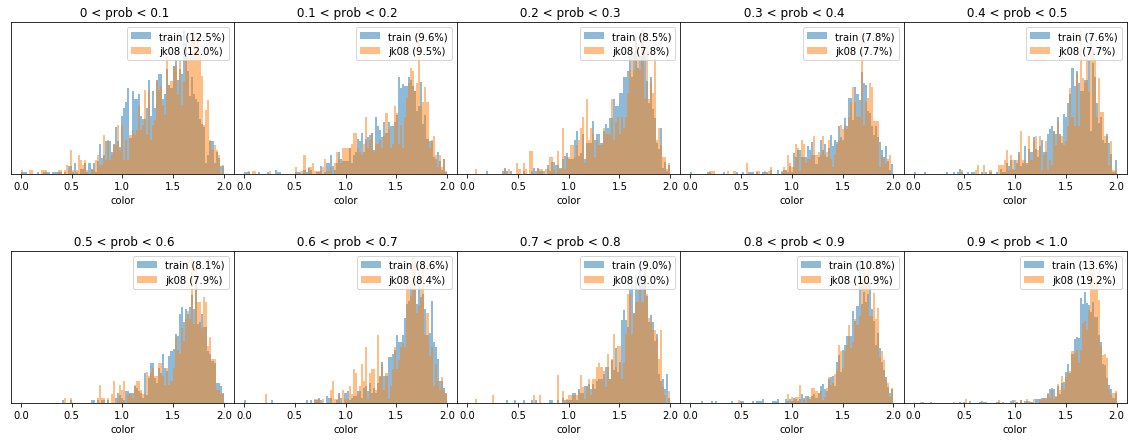

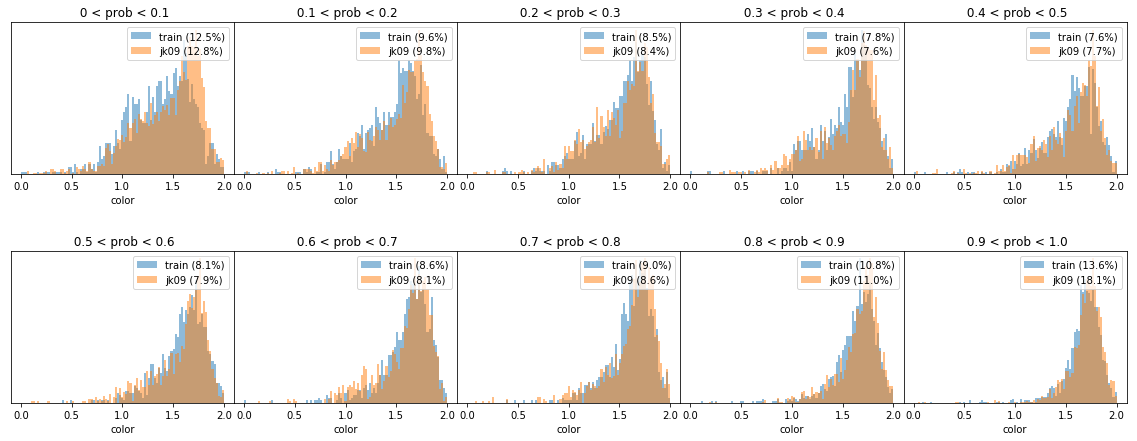

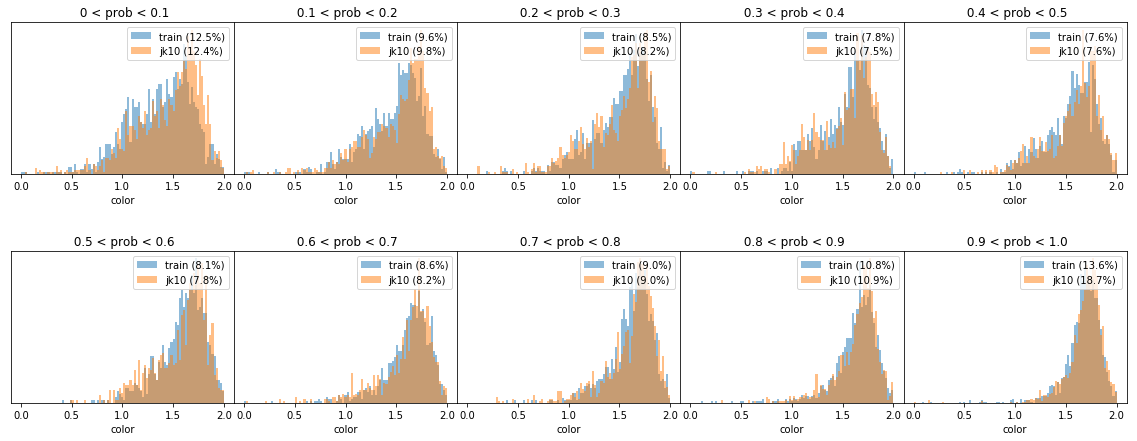

In [99]:
 
labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))]
cbin = np.linspace(0,2,100)

for j in range(10):  
    probcut = 0
    catlist = [gold_train_prob] + dmlist[j:j+1]
    labels = ['train']+ ['jk{:02}'.format(i+1) for i in range(len(dmlist))][j:j+1]
    fig, ax = plt.subplots(2,5, figsize=(20,7))
    ax = ax.ravel()

    for i in range(10):     
        for la, cat in zip(labels, catlist) :     
            mask = (cat['EachProb_CMASS'] > probcut) & (cat['EachProb_CMASS'] < probcut + 0.1) \
            & (cat['EachProb_CMASS'] > 0.01)
            ax[i].hist( (cat['MAG_MODEL_G']-cat['MAG_MODEL_R'])[mask], \
                    bins = cbin, alpha = 0.5, label = la + ' ({:0.1f}%)'.format(np.sum(mask)*1./mask.size*100), \
                       normed=True, histtype='stepfilled' );  
            #print i, probcut, probcut+0.1, np.sum(mask), la
            #print i, 
            tag = ' {} < prob < {}'.format(probcut, probcut+0.1)
            #ax[i].set_xlim(0, 1.0)
            ax[i].legend(loc='best')
            ax[i].set_title(tag)
            ax[i].set_xlabel('color')
            ax[i].set_ylabel('n')
            ax[i].get_yaxis().set_visible(False)
            #elif i != 2 : ax[i].get_yaxis().set_visible(False)

        probcut += 0.1

    #ax[0].get_yaxis().set_visible(True)
    #ax[5].get_yaxis().set_visible(True)
    fig.subplots_adjust(wspace=0, hspace=0.5);
    fig.savefig('../output/n6_modelgr//pics/probhist_magmodelgr_jk{:03}.png'.format(j+1))

In [55]:
import pickle
file = open('../output/n6_modelgr/gold_st82_XD_cmass.pkl', 'rb') 
clf = pickle.load(file)

In [57]:
random_sample = clf['retval'].sample(1000)

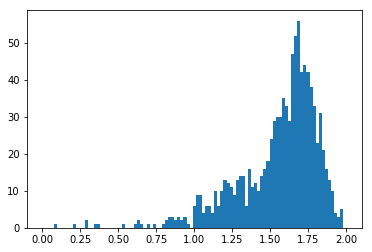

In [61]:
fig, ax = plt.subplots()
ax.hist( random_sample[:,0], bins = np.linspace(0,2,100));

In [60]:
random_sample[0,:].shape

(6,)

In [62]:
random_sample.shape

(1000, 6)

In [63]:
clf['retval'].V.shape

(10, 6, 6)